In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df =  pd.read_csv('Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.isnull().sum().sum()

0

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df["customerID"].duplicated().sum()

0

### converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [19]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

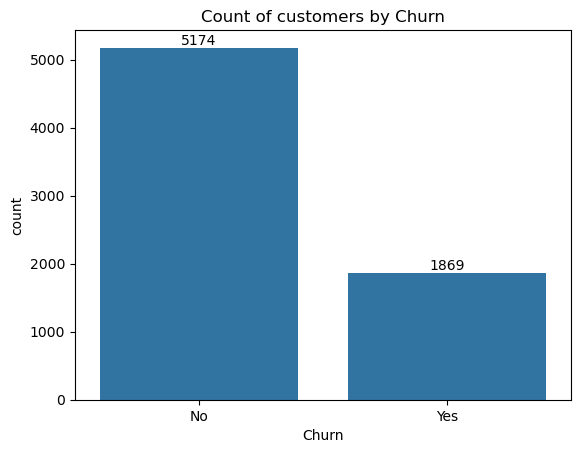

In [33]:
ax = sns.countplot(x = df['Churn'])
ax.bar_label(ax.containers[0])
plt.title('Count of customers by Churn')
plt.show()

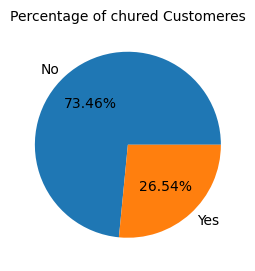

In [35]:
plt.figure(figsize=(3,4))
gb = df.groupby(df['Churn']).agg({'Churn':'count'})
gb
plt.pie(gb['Churn'], labels= gb.index, autopct= '%1.2f%%')
plt.title('Percentage of chured Customeres',fontsize= 10)
plt.show()

### from the given pie chart we can conclude that 26.54% of our customers have churned out.

### not let's explore the reason behind it

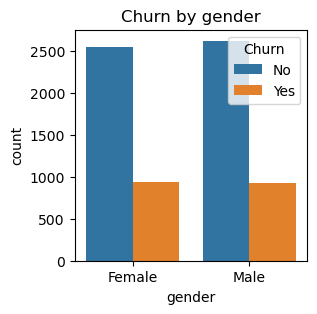

In [41]:
plt.figure(figsize=(3,3))
sns.countplot(x = df['gender'], hue=df['Churn'])
plt.title('Churn by gender')
plt.show()

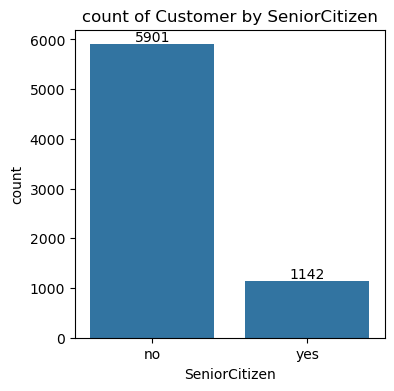

In [46]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x = df['SeniorCitizen'])
ax.bar_label(ax.containers[0])
plt.title('count of Customer by SeniorCitizen')
plt.show()

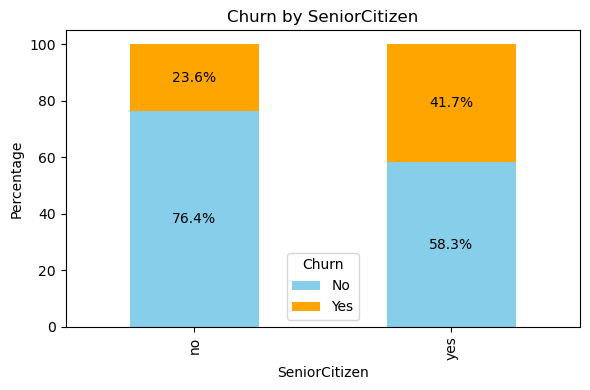

In [43]:
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100


ax = percentages.plot(
    kind='bar', 
    stacked=True, 
    figsize=(6, 4), 
    color=['skyblue', 'orange']
)

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        height = bar.get_height()
        x, y = bar.get_xy()
        if height > 0: 
            ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

plt.title('Churn by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### comparative a greater pecentage of people in senior citizen category have churned

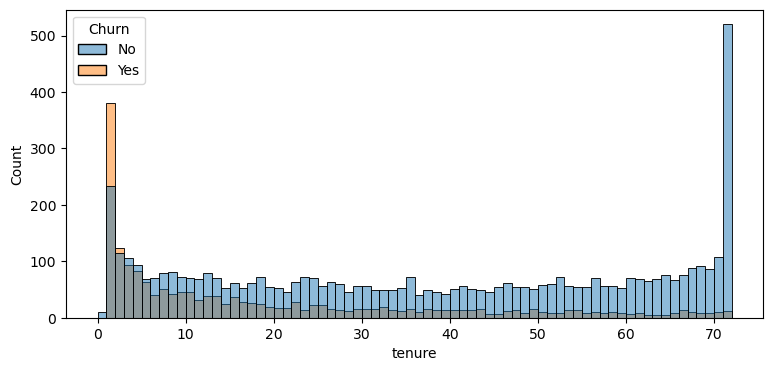

In [47]:
plt.figure(figsize=(9,4))
sns.histplot(x= df['tenure'], bins= 72, hue=df['Churn'])
plt.show()

### people who have used our services for a long time have stayed and people who have used our sevices

### 1 or 2 months have churned

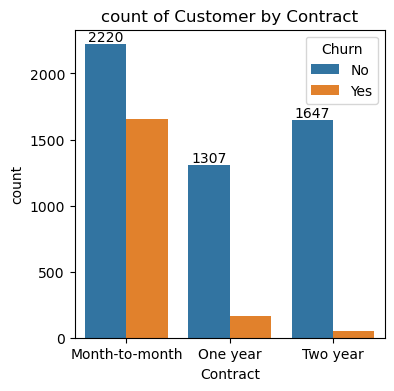

In [49]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x = df['Contract'], hue= df['Churn'])
ax.bar_label(ax.containers[0])
plt.title('count of Customer by Contract')
plt.show()

#### people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [50]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

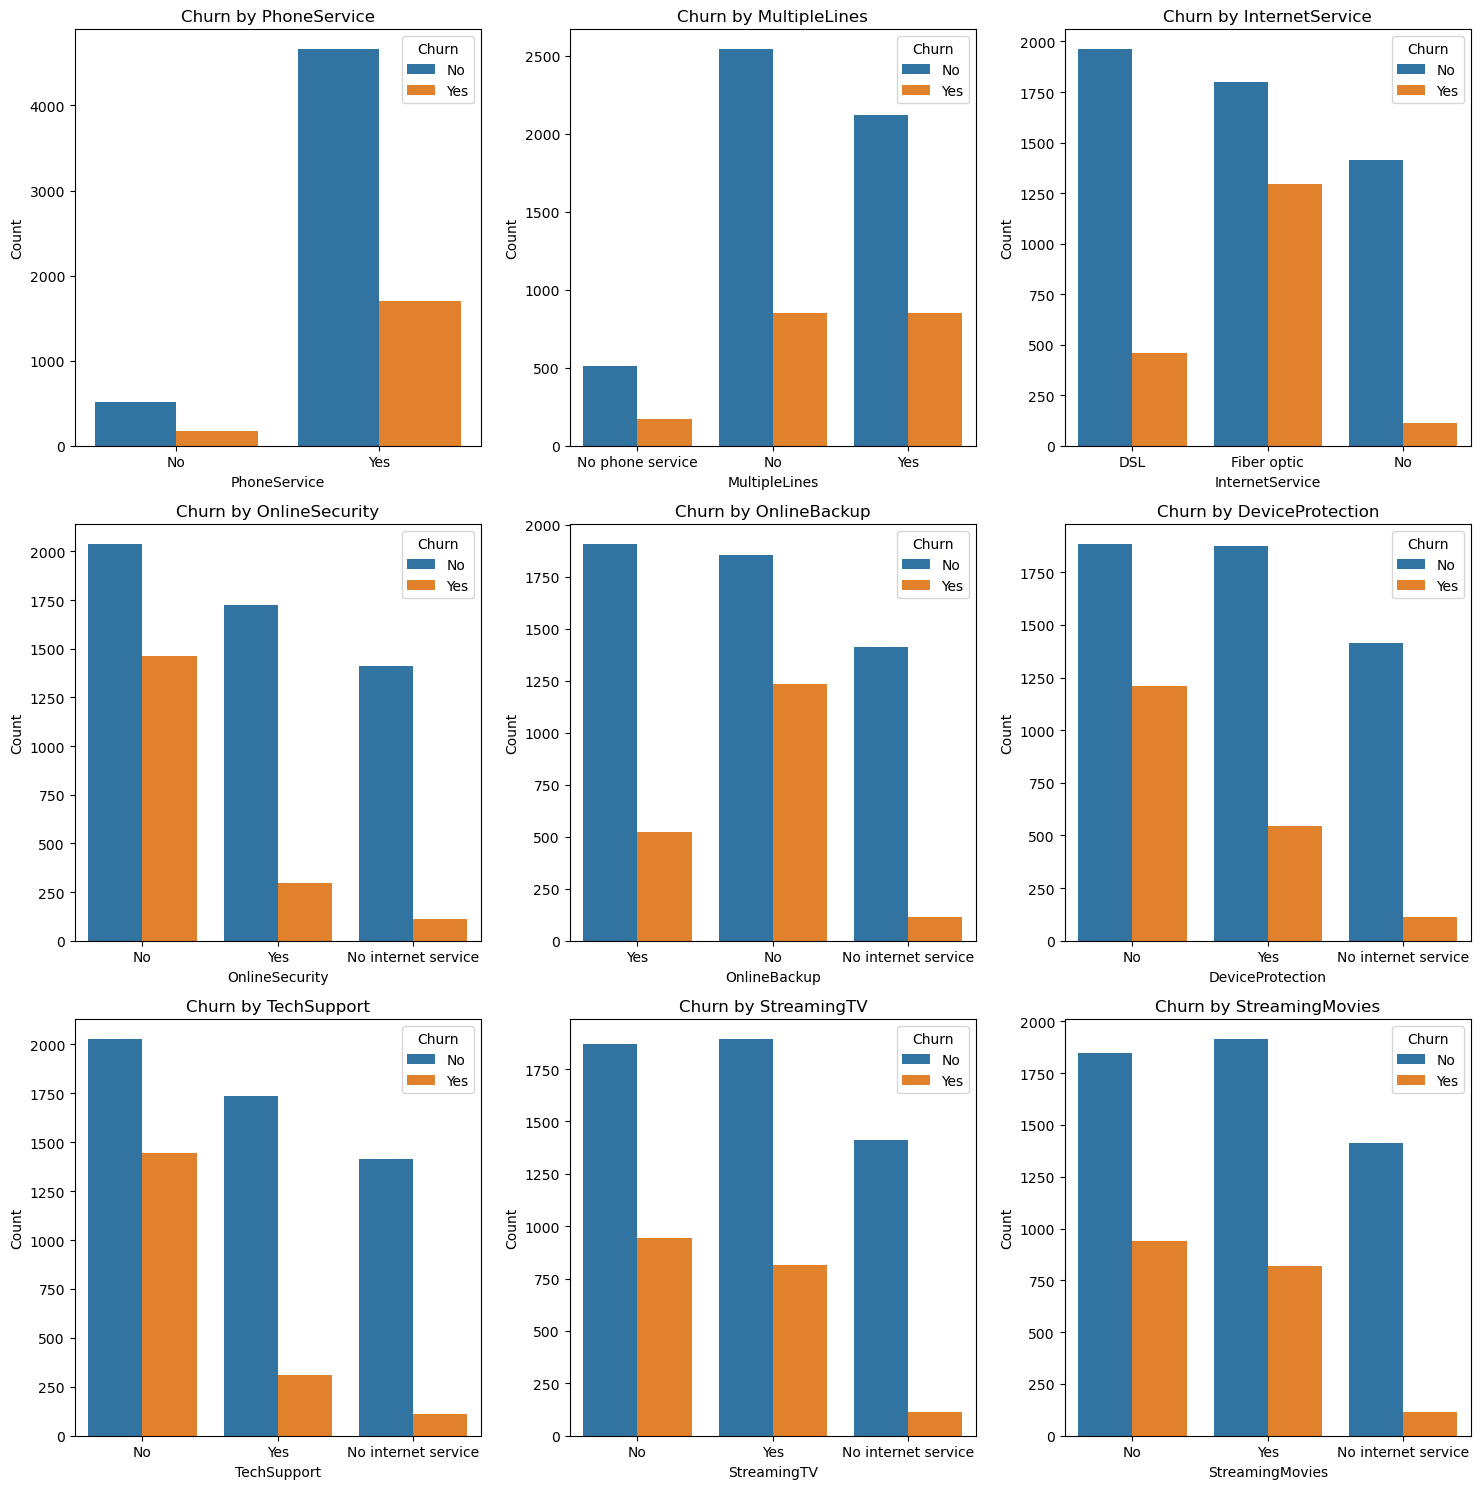

In [51]:
# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define the number of rows and columns for subplots
n_cols = 3  # Number of subplots per row
n_rows = -(-len(columns) // n_cols)  # Calculate the number of rows needed (ceil)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten to easily iterate over

# Generate a countplot for each column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

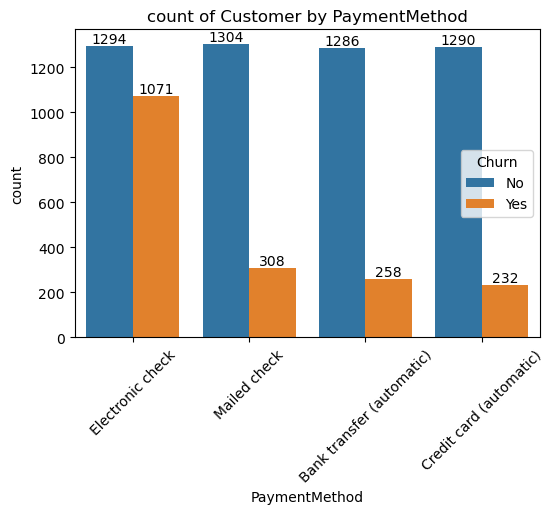

In [55]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x = df['PaymentMethod'], hue= df['Churn'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('count of Customer by PaymentMethod')
plt.xticks(rotation=45)
plt.show()

#### customer is likely to churn when he is using electronic check as a payment method.